In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, text, inspect, func
from sqlalchemy import Column, Integer, String, Float, Date
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base

In [20]:
import numpy as np
import pandas as pd
import datetime as dt
import datetime

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [52]:
# Define the base class for declarative class definitions
Base = declarative_base()

# Define the Station class that corresponds to the station table
class Station(Base):
    __tablename__ = 'station'
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)


C:\Users\laura\AppData\Local\Temp\ipykernel_4976\1905755049.py:2: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [23]:
#create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

#collect the names of the tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")

    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()


measurement
-----------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
-----------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [30]:
# Declare a Base using 'automap_base()'
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
print(list(Base.classes))

C:\Users\laura\AppData\Local\Temp\ipykernel_4976\1271500785.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


[<class 'sqlalchemy.ext.automap.measurement'>, <class 'sqlalchemy.ext.automap.station'>]


In [42]:
print(df.columns)

Index(['date', 'station', 'prcp'], dtype='object')


In [31]:
# View all of the classes that automap found
for table_name in Base.classes.keys():
    print(f"Table Name: {table_name}")
    for column in Base.classes[table_name].__table__.columns:
        print(f"\tColumn: {column}")

Table Name: measurement
	Column: measurement.id
	Column: measurement.station
	Column: measurement.date
	Column: measurement.prcp
	Column: measurement.tobs
Table Name: station
	Column: station.id
	Column: station.station
	Column: station.name
	Column: station.latitude
	Column: station.longitude
	Column: station.elevation


In [32]:
# Save references to each table
tables = {}

for table_name in Base.classes.keys():

    tables[table_name] = Base.classes[table_name]

# Print the tables dictionary to see what tables were saved
print("Tables found and saved:")
for table_name, table_class in tables.items():
    print(f"Table Name: {table_name}, Class: {table_class}")

Tables found and saved:
Table Name: measurement, Class: <class 'sqlalchemy.ext.automap.measurement'>
Table Name: station, Class: <class 'sqlalchemy.ext.automap.station'>


In [33]:
# Bind the engine to the base class
Base.metadata.bind = engine

In [34]:
Session = sessionmaker(bind=engine)
session = Session()

# Exploratory Precipitation Analysis

In [35]:
# Define the query to find the maximum date from 'measurement' table
query = "SELECT max(date) FROM measurement"

# Execute the query using a connection from the engine
with engine.connect() as conn:
    result = conn.execute(text(query)).fetchall()
    print(f"The most recent date in the 'measurement' table is: {result[0][0]}")

The most recent date in the 'measurement' table is: 2017-08-23


In [36]:
query = """
    SELECT
         date,
         station,
         prcp
    FROM
       measurement
    WHERE
        date >= '2016-08-23'
    ORDER BY
        date ASC;
"""

df = pd.read_sql(text(query), con=engine)
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00513117,0.15
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00517948,NaN
4,2016-08-23,USC00519523,0.02


In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = datetime.date(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
     filter(Measurement.date >= start_date).\
     order_by(Measurement.date.asc()).\
     all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(results, columns=["Date", "Station", "Precipitation"])

# Sort the dataframe by date
df2["Date"] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
df2.head()

,Date,Station,Precipitation
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00513117,0.15
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00517948,NaN
4,2016-08-23,USC00519523,0.02


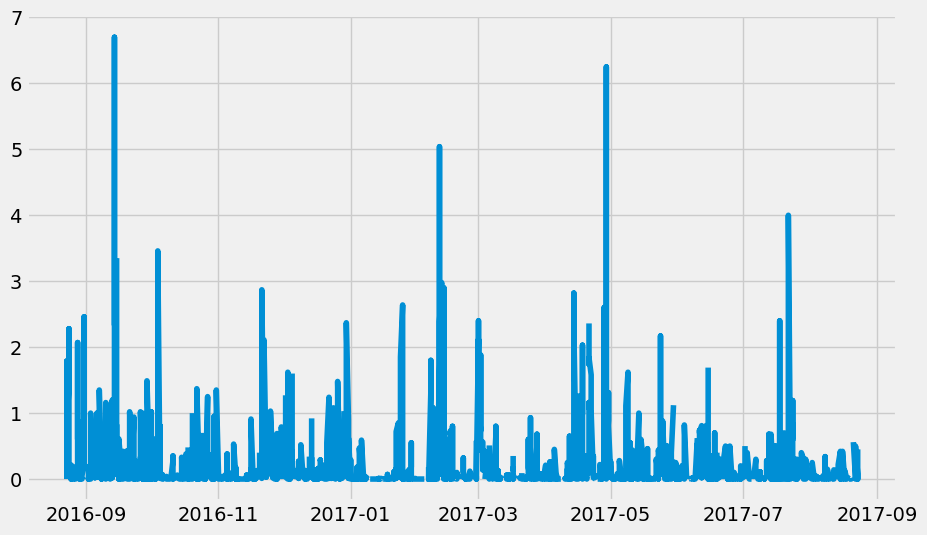

In [38]:
plt.figure(figsize=(10,6))

plt.plot(df2.Date, df2.Precipitation)
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['prcp'].describe()
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [55]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

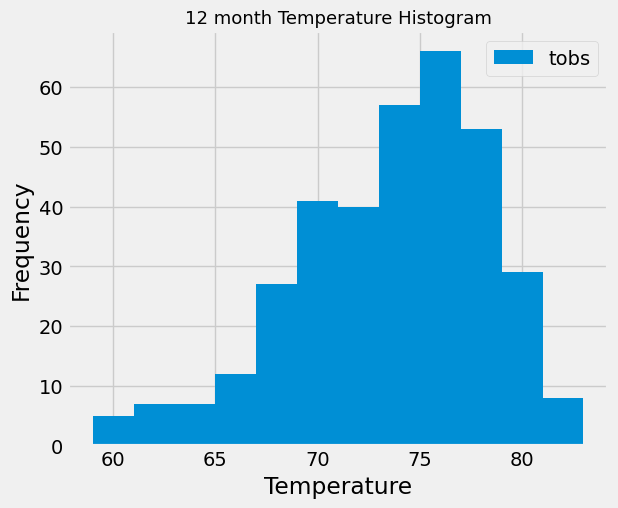

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>='2016-08-23').all()

#Plot results
high_station_temp=pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [58]:
# Close Session
session.close()